## Image classifier for lions and tigers
### 100% accuracy using transfer learning and 80 images
This notebook is inspired by lessons 1 and 2 of the third course by [fastai](fast.ai).

Advances in deep learning in recent years have made it trivial to achieve 99% accuracy in objectives including discerning animal breeds or types of vegetation. 

This notebook explores to make one's own dataset from Google Images, and how by using transfer learning and the fastai library, a relatively small dataset can yield worthwhile results. 

In [1]:
from fastai.vision import *

## Collecting a list of URLs
-With thanks to fastai's [tutorial](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) on image scraping.

Here's the short version: search for the images of interest, scroll down until there are a few hundred showing, then download into a file using the javascript code below in the console (accessed via developer tools (<kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac)). The image urls will appear as a file in your downloads folder. Open as a text file.

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

The fastai library is filled with features to make our lives easier as developers, and to help everyone get up and running with deep learning. We will use some of their excellent `vision` library to convert the urls into images we can work with.

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [2]:
folder = 'lion'
file = 'urls_lion.txt'

In [ ]:
folder = 'tiger'
file = 'urls_tiger.txt'

You will need to run this line once per each category.

In [3]:
path = Path('data/lion_tiger/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[WindowsPath('data/lion_tiger/lion'),
 WindowsPath('data/lion_tiger/models'),
 WindowsPath('data/lion_tiger/tiger'),
 WindowsPath('data/lion_tiger/urls_lion.txt'),
 WindowsPath('data/lion_tiger/urls_tiger.txt')]

It's best to create the `'urls...txt'` files and add the downloaded urls manually (these will often download as a non-descript file, use notepad to open them and then copy the urls). 

## Download images

Now to download the images from their respective urls.

fast.ai has a function that allows us to specify the urls filename and the destination folder and which then downloads and saves all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. We'll stick to 200 images since I hope to experiment with how far a relatively small amount of data can take us.

We run this line once for every category.

In [5]:
classes = ['lion','tiger']

In [6]:
# download_images(path/file, dest, max_pics=200)

In [7]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

lion


tiger


## View data

In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Let's take a look at some of our pictures.

In [10]:
data.classes

['lion', 'tiger']

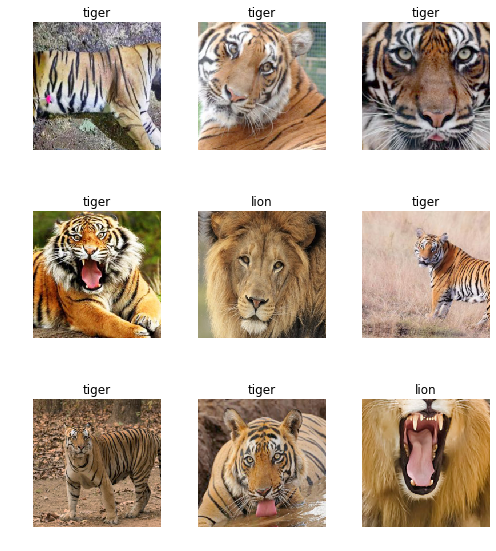

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lion', 'tiger'], 2, 64, 16)

## Train model using transfer Learning

The fastai library has integrated models for transfer learning. In this case, we use resnet34, a sophisticated architecture trained on millions of images. By loading the model, we are benefitting from the training weights it devised from work drawing on more data and processing power than most can put their hands on.

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.883732,0.704802,0.312500
2,0.902853,0.194144,0.062500
3,0.652448,0.067950,0.000000
4,0.499297,0.041296,0.000000


In [15]:
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

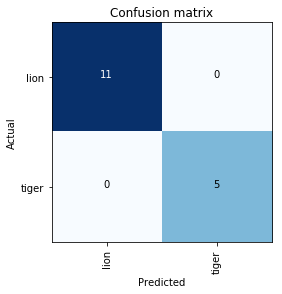

In [17]:
interp.plot_confusion_matrix()

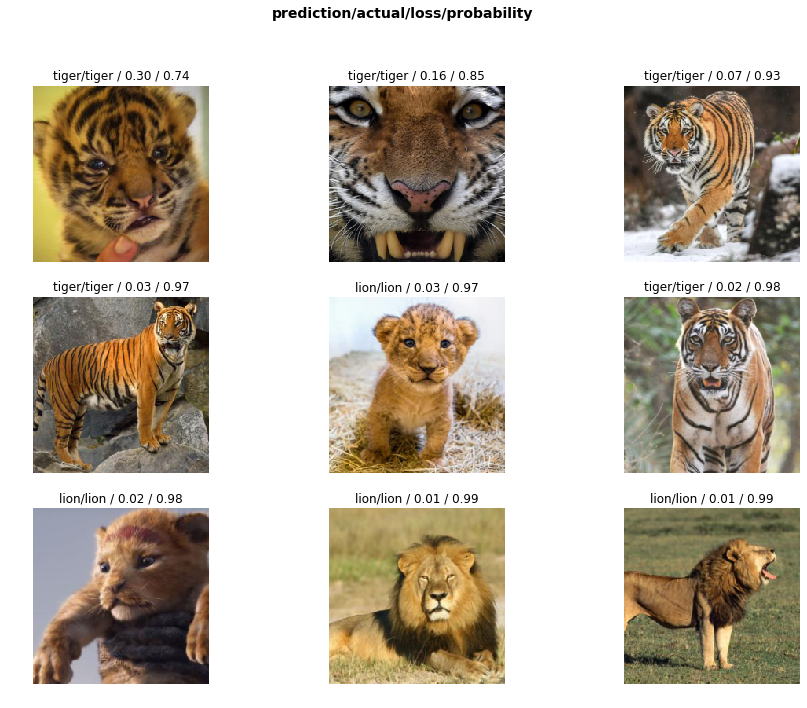

In [18]:
interp.plot_top_losses(9, figsize=(15,11))